In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayedgamal99","key":"4179995e897c2f2d637b366d708bb2ef"}'}

In [2]:
import os
import shutil

# Create the /root/.kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json file to the /root/.kaggle directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set appropriate permissions on the file
os.chmod('/root/.kaggle/kaggle.json', 600)

In [3]:
!kaggle config view

Configuration values from /root/.kaggle
- username: sayedgamal99
- path: None
- proxy: None
- competition: None


In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:03<00:00, 204MB/s]
100% 812M/812M [00:04<00:00, 213MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [6]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [7]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
      dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [8]:
print("Current directory:", os.getcwd())

Current directory: /content


In [9]:
# [print(f"Contents of folder '{'train'}':\n",
#        os.listdir('train')) for folder in ["train"]]


In [10]:
# [print(f"Contents of folder '{'Cats vs Dogs small'}':\n",
#        os.listdir('cats_vs_dogs_small/train/cat')) for folder in ['cats_vs_dogs_small/train/cat']]

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
import keras

In [12]:
model = Sequential([
    Input(shape=(180,180,3)),
    Rescaling(1./255),

    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    Flatten(),

    Dense(1,activation='sigmoid')

])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [14]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

In [16]:
train_dataset = image_dataset_from_directory(
 new_base_dir / "train",
 image_size=(180, 180),
 batch_size=32)

validation_dataset = image_dataset_from_directory(
 new_base_dir / "validation",
 image_size=(180, 180),
 batch_size=32)

test_dataset = image_dataset_from_directory(
 new_base_dir / "test",
 image_size=(180, 180),
 batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [17]:
for bat, lab in train_dataset:
  print(bat.shape)
  print(lab.shape)
  break

(32, 180, 180, 3)
(32,)


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
callbacks = [
        ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [20]:
history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks
 )

Epoch 1/30
31/63 [=============>................] - ETA: 2s - loss: 0.7097 - accuracy: 0.5000

KeyboardInterrupt: ignored

In [21]:
import matplotlib.pyplot as plt

In [22]:
def plot_perfomance(history,figsize=(12,5)):
  plt.style.use('seaborn')
  fig,ax = plt.subplots(1,2,figsize=figsize)
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)

  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy",color='#1e9650')
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy",color='#1e9650')
  ax[0].set_title("Training and validation accuracy")

  ax[0].legend()

  ax[1].plot(epochs, loss, "bo", label="Training loss",color='#961e1e')
  ax[1].plot(epochs, val_loss, "b", label="Validation loss",color='#961e1e')
  ax[1].set_title("Training and validation loss")
  ax[1].legend()

  plt.show()

<ipython-input-62-35ffc1a4f3fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-62-35ffc1a4f3fc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy",color='#1e9650')
<ipython-input-62-35ffc1a4f3fc>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy",color='#1e9650')
<ipython-input-62-35ffc1a4f3fc>:16: UserWarning: color is redundantly defined by the 'color' keyw

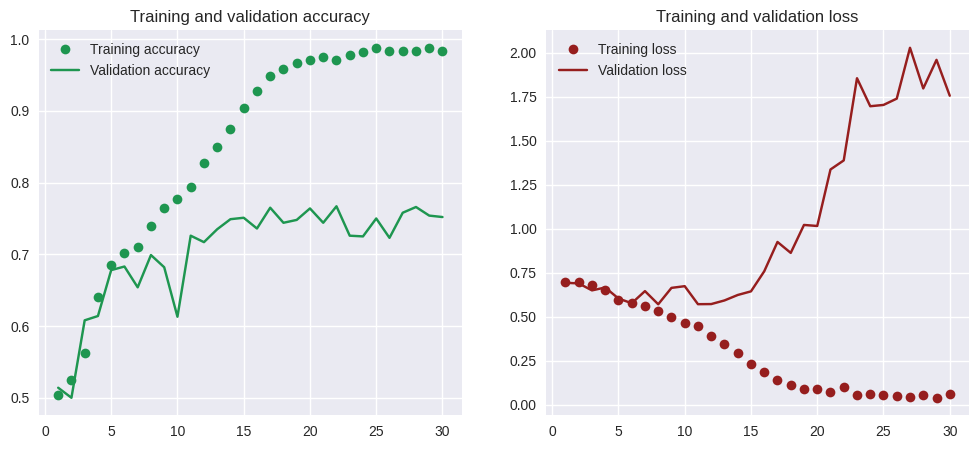

In [63]:
plot_perfomance(history)

In [22]:
test_model = keras.models.load_model("convnet_from_scratch.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 51ms/step - loss: 0.5613 - accuracy: 0.7165
Test accuracy: 0.716


# Data Augmentation

In [23]:
from  tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

In [24]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(.1),
    layers.RandomZoom(.5)
])

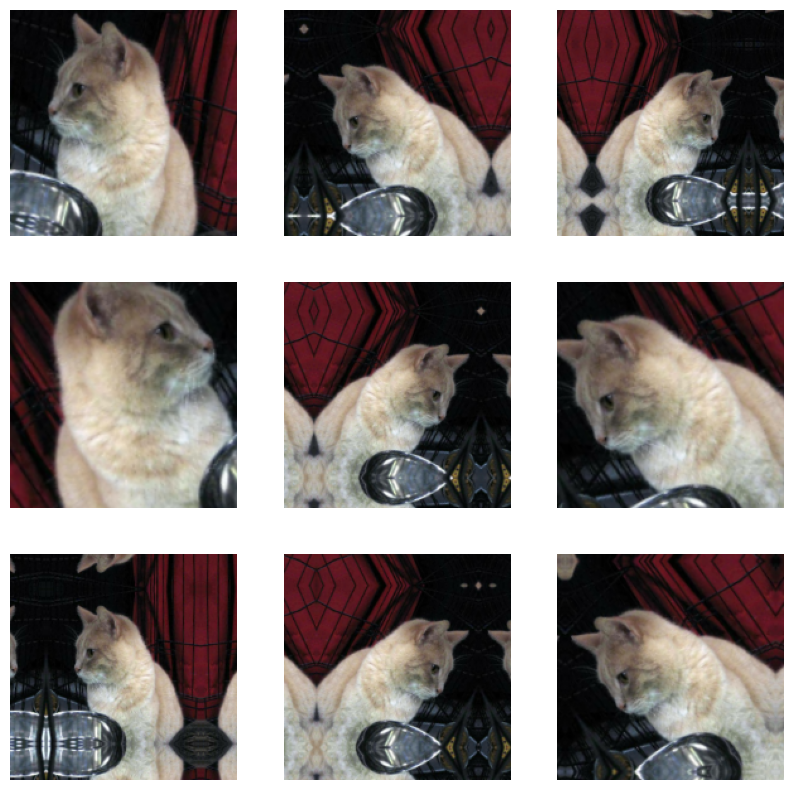

In [25]:
plt.figure(figsize=(10,10))
for image,_ in train_dataset.take(1):
  for i in range(9):
    the_image_sample = data_augmentation(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(the_image_sample[0].numpy().astype('uint8'))
    plt.axis('off')

----

In [26]:
modell = Sequential([
    Input(shape=(180,180,3)),
    data_augmentation,
    Rescaling(1./255),

    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    Flatten(),
    Dropout(.5),
    Dense(1,activation='sigmoid')

])

In [27]:
modell.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.x",
 save_best_only=True,
 monitor="val_loss")
]

In [52]:
model_with_aug = modell.fit(train_dataset,epochs=100,
           validation_data=validation_dataset,
           callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 12s 145ms/step - loss: 0.7009 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 8s 113ms/step - loss: 0.6937 - accuracy: 0.5050 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 8s 130ms/step - loss: 0.6905 - accuracy: 0.5525 - val_loss: 0.6773 - val_accuracy: 0.5520
Epoch 4/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6798 - accuracy: 0.5940 - val_loss: 0.6508 - val_accuracy: 0.6640
Epoch 5/100
63/63 [==============================] - 6s 91ms/step - loss: 0.6564 - accuracy: 0.6155 - val_loss: 1.0189 - val_accuracy: 0.5410
Epoch 6/100
63/63 [==============================] - 6s 92ms/step - loss: 0.6477 - accuracy: 0.6365 - val_loss: 0.6466 - val_accuracy: 0.5920
Epoch 7/100
63/63 [==============================] - 7s 104ms/step - loss: 0.6199 - accuracy: 0.6655 - val_loss: 0.5984 - val_accuracy: 0.6800


<ipython-input-62-35ffc1a4f3fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-62-35ffc1a4f3fc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy",color='#1e9650')
<ipython-input-62-35ffc1a4f3fc>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy",color='#1e9650')
<ipython-input-62-35ffc1a4f3fc>:16: UserWarning: color is redundantly defined by the 'color' keyw

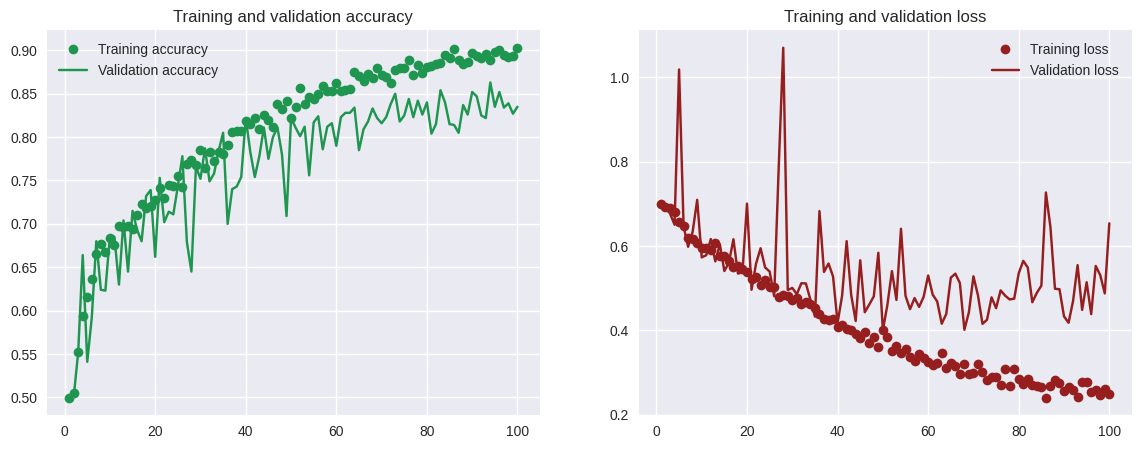

In [64]:
plot_perfomance(model_with_aug,figsize=(14,5))

In [70]:
best = tensorflow.keras.models.load_model('convnet_from_scratch_with_augmentation.x')
loss,acc = best.evaluate(test_dataset)
print(f'Model With Data Augmentation:\nAccuracy: {100*acc:.2f}%')

63/63 [==============================] - 3s 40ms/step - loss: 0.4231 - accuracy: 0.8180
Model With Data Augmentation:
Accuracy: 81.80%


In [74]:
folder_path = '/content/convnet_from_scratch_with_augmentation.x'
shutil.make_archive("/content/model_with_augmentation_download", 'zip', folder_path)

files.download('/content/model_with_augmentation_download.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Using Pretrained MODELS

In [29]:
conv_base =  tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180,180,3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [33]:
for images,labels in validation_dataset:
  print(images.shape,labels.shape)
  break

(32, 180, 180, 3) (32,)


In [35]:
import numpy as np

In [36]:
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [37]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 31ms/step


In [38]:
train_features.shape

(2000, 5, 5, 512)

In [39]:
themodel = Sequential([
    Input(shape=(5,5,512)),
    Flatten(),
    Dense(256),
    Dropout(.5),
    Dense(units=1,activation='sigmoid')
])

In [40]:
themodel.compile(loss='binary_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])

In [41]:
callbacks = [
 tf.keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.x",
 save_best_only=True,
 monitor="val_loss")
]

In [42]:
thevgg = themodel.fit(
    train_features,train_labels,
    epochs=30,
    callbacks=callbacks,
    validation_data=(val_features,val_labels)
)

Epoch 1/30
63/63 [==============================] - 3s 25ms/step - loss: 22.8910 - accuracy: 0.9280 - val_loss: 2.1420 - val_accuracy: 0.9740
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 4.6847 - accuracy: 0.9695 - val_loss: 5.6691 - val_accuracy: 0.9630
Epoch 3/30
63/63 [==============================] - 0s 6ms/step - loss: 2.5204 - accuracy: 0.9820 - val_loss: 3.3789 - val_accuracy: 0.9770
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 0.7811 - accuracy: 0.9930 - val_loss: 4.8187 - val_accuracy: 0.9700
Epoch 5/30
63/63 [==============================] - 0s 6ms/step - loss: 1.7790 - accuracy: 0.9875 - val_loss: 4.6168 - val_accuracy: 0.9780
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: 0.2214 - accuracy: 0.9970 - val_loss: 4.8478 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.9940 - val_loss: 6.3167 - val_accuracy: 0.9710
Epoch 8/30
63/63 [

<ipython-input-22-35ffc1a4f3fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-22-35ffc1a4f3fc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy",color='#1e9650')
<ipython-input-22-35ffc1a4f3fc>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy",color='#1e9650')
<ipython-input-22-35ffc1a4f3fc>:16: UserWarning: color is redundantly defined by the 'color' keyw

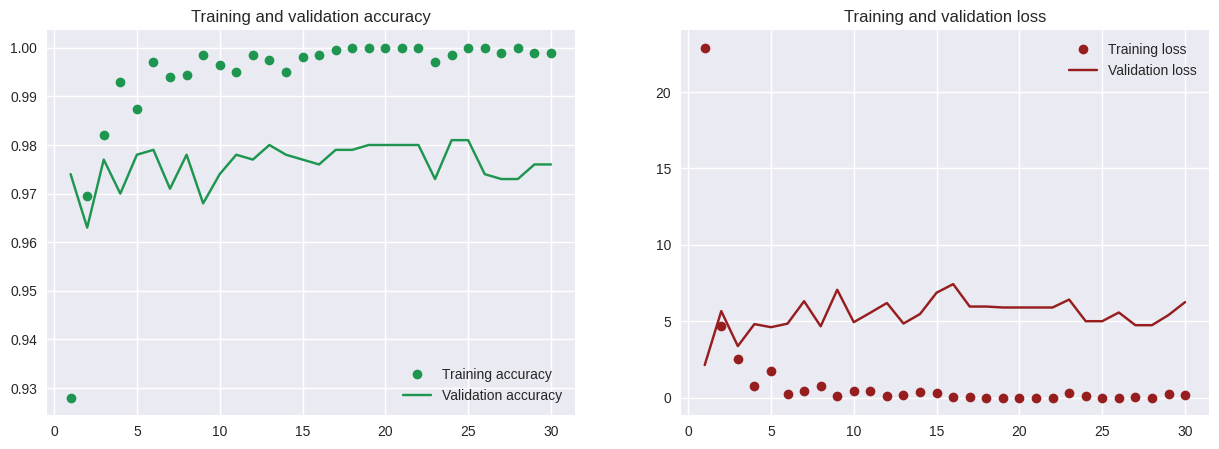

In [43]:
plot_perfomance(thevgg,figsize=(15,5))

# Using Data Augmentation with Pre-Trained Model (VGG)

In [44]:
conv_base = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False
)
conv_base.trainable = False

In [45]:
data_aug  = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(.2),
    layers.RandomRotation(.2)
])

In [54]:
model = Sequential([
    Input(shape=(180,180,3)),
    data_aug,
    layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x)),
    conv_base,
    Flatten(),
    Dense(256),
    Dropout(.4),
    Dense(1,activation='sigmoid')
])

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 lambda_1 (Lambda)           (None, 180, 180, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [56]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [57]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_with_data_augmentation.x",
 save_best_only=True,
 monitor="val_loss")
]

In [58]:
prefict = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 15s 210ms/step - loss: 25.8762 - accuracy: 0.8595 - val_loss: 6.6591 - val_accuracy: 0.9500
Epoch 2/50
63/63 [==============================] - 12s 184ms/step - loss: 8.3377 - accuracy: 0.9110 - val_loss: 3.3581 - val_accuracy: 0.9740
Epoch 3/50
63/63 [==============================] - 12s 183ms/step - loss: 7.6255 - accuracy: 0.9280 - val_loss: 3.0739 - val_accuracy: 0.9750
Epoch 4/50
63/63 [==============================] - 14s 218ms/step - loss: 5.6606 - accuracy: 0.9390 - val_loss: 2.7928 - val_accuracy: 0.9710
Epoch 5/50
63/63 [==============================] - 12s 180ms/step - loss: 5.8052 - accuracy: 0.9415 - val_loss: 2.4482 - val_accuracy: 0.9750
Epoch 6/50
63/63 [==============================] - 11s 173ms/step - loss: 3.8617 - accuracy: 0.9465 - val_loss: 5.4073 - val_accuracy: 0.9570
Epoch 7/50
63/63 [==============================] - 9s 141ms/step - loss: 3.6423 - accuracy: 0.9485 - val_loss: 3.6867 - val_accuracy: 0.9700

In [59]:
test_model = keras.models.load_model(
 "feature_extraction_with_data_augmentation.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 92ms/step - loss: 0.3934 - accuracy: 0.9765
Test accuracy: 0.976


<ipython-input-22-35ffc1a4f3fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-22-35ffc1a4f3fc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy",color='#1e9650')
<ipython-input-22-35ffc1a4f3fc>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy",color='#1e9650')
<ipython-input-22-35ffc1a4f3fc>:16: UserWarning: color is redundantly defined by the 'color' keyw

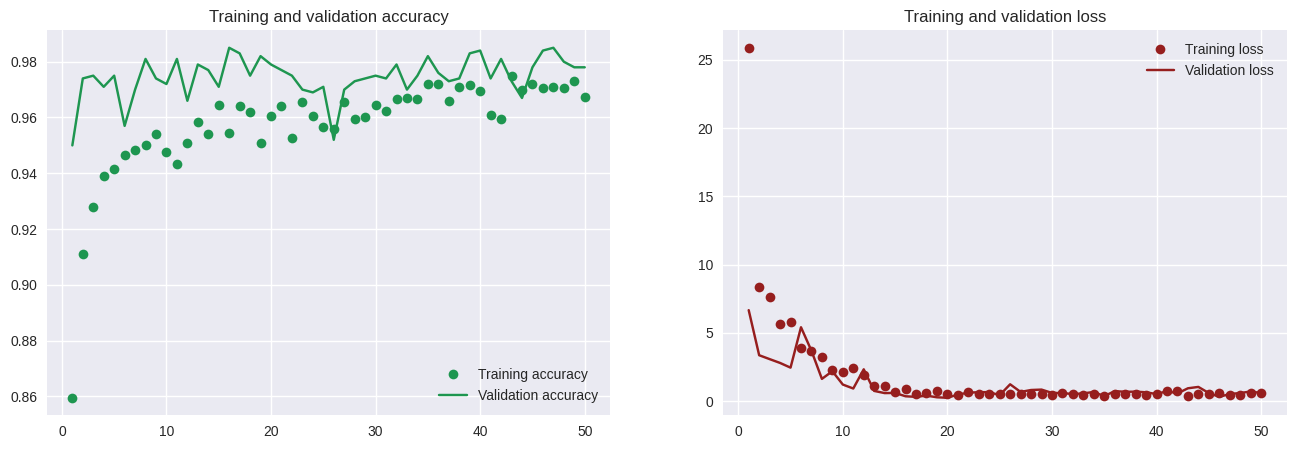

In [61]:
plot_perfomance(prefict,figsize=(16,5))

# Fine Tuning pretrained model

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [64]:
conv_base = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180,180,3)
)


In [65]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [67]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [69]:
model = Sequential([
    Input(shape=(180,180,3)),
    data_aug,
    layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x)),
    conv_base,
    Flatten(),
    Dense(256),
    Dropout(.4),
    Dense(1,activation='sigmoid')
])

In [70]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.x",
 save_best_only=True,
 monitor="val_loss")

]


In [71]:
fined = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 204ms/step - loss: 3.3464 - accuracy: 0.7460 - val_loss: 0.5214 - val_accuracy: 0.9320
Epoch 2/30
63/63 [==============================] - 15s 236ms/step - loss: 1.1141 - accuracy: 0.8490 - val_loss: 0.3854 - val_accuracy: 0.9440
Epoch 3/30
63/63 [==============================] - 13s 204ms/step - loss: 0.6844 - accuracy: 0.8810 - val_loss: 0.2514 - val_accuracy: 0.9540
Epoch 4/30
63/63 [==============================] - 13s 211ms/step - loss: 0.4640 - accuracy: 0.9020 - val_loss: 0.1922 - val_accuracy: 0.9600
Epoch 5/30
63/63 [==============================] - 15s 230ms/step - loss: 0.3616 - accuracy: 0.9015 - val_loss: 0.1624 - val_accuracy: 0.9580
Epoch 6/30
63/63 [==============================] - 13s 207ms/step - loss: 0.2970 - accuracy: 0.8970 - val_loss: 0.1500 - val_accuracy: 0.9640
Epoch 7/30
63/63 [==============================] - 13s 204ms/step - loss: 0.2317 - accuracy: 0.9220 - val_loss: 0.1497 - val_accuracy: 0.9710

In [73]:
m = keras.models.load_model("fine_tuning.x")
test_loss, test_acc = m.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 93ms/step - loss: 0.1278 - accuracy: 0.9755
Test accuracy: 0.975


<ipython-input-22-35ffc1a4f3fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-22-35ffc1a4f3fc>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy",color='#1e9650')
<ipython-input-22-35ffc1a4f3fc>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy",color='#1e9650')
<ipython-input-22-35ffc1a4f3fc>:16: UserWarning: color is redundantly defined by the 'color' keyw

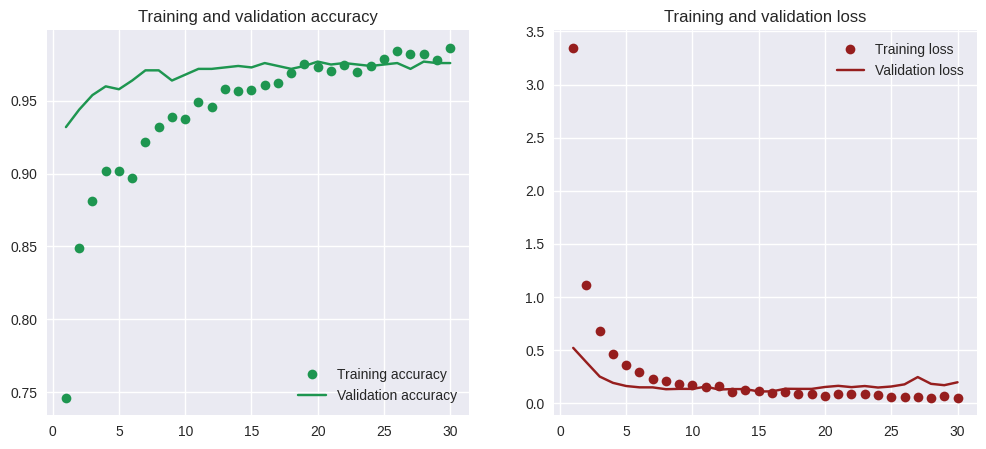

In [74]:
plot_perfomance(fined)